In [1]:
# 세팅
# 1) 라이브러리 설치 (처음 1번만 하면 됨)
!pip -q install finance-datareader openpyxl

# 2) 라이브러리 불러오기
import FinanceDataReader as fdr
import pandas as pd
from datetime import datetime

# 3) 수집 기간 설정: 2023-01-01 ~ 오늘(코랩 실행 시점)
start_date = "2023-01-01"
end_date = datetime.today().strftime("%Y-%m-%d")

print("수집 기간:", start_date, "~", end_date)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 3.3 MB/s eta 0:00:00
수집 기간: 2023-01-01 ~ 2025-12-24


In [2]:
# 삼성전자 데이터 불러오기
# 삼성전자 종목코드(코스피): 005930
ticker = "005930"

# 2023-01-01 ~ 오늘까지 데이터 수집
df = fdr.DataReader(ticker, start_date, end_date)

# 데이터 확인
print("행/열:", df.shape)
display(df.head())
display(df.tail())


행/열: (728, 6)


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-01-02,55500,56100,55200,55500,10031448,0.003617
2023-01-03,55400,56000,54500,55400,13547030,-0.001802
2023-01-04,55700,58000,55600,57800,20188071,0.043321
2023-01-05,58200,58800,57600,58200,15682826,0.006920
2023-01-06,58300,59400,57900,59000,17334989,0.013746


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2025-12-18,106400,108200,105700,107600,20445631,-0.002780
2025-12-19,109700,109700,106200,106300,25917098,-0.012082
2025-12-22,109700,110500,109300,110500,24859171,0.039511
2025-12-23,110900,112500,110400,111500,20419187,0.009050
2025-12-24,112400,112400,110900,111100,12492939,-0.003587


In [3]:
# 삼성전자 데이터 저장
# 저장할 엑셀 파일명
file_name = "samsung_stock_data.xlsx"

# 인덱스(Date)를 컬럼으로 변환
df_reset = df.reset_index()

# 엑셀 파일로 저장
df_reset.to_excel(file_name, index=False)

print(f"엑셀 파일 저장 완료: {file_name}")


엑셀 파일 저장 완료: samsung_stock_data.xlsx


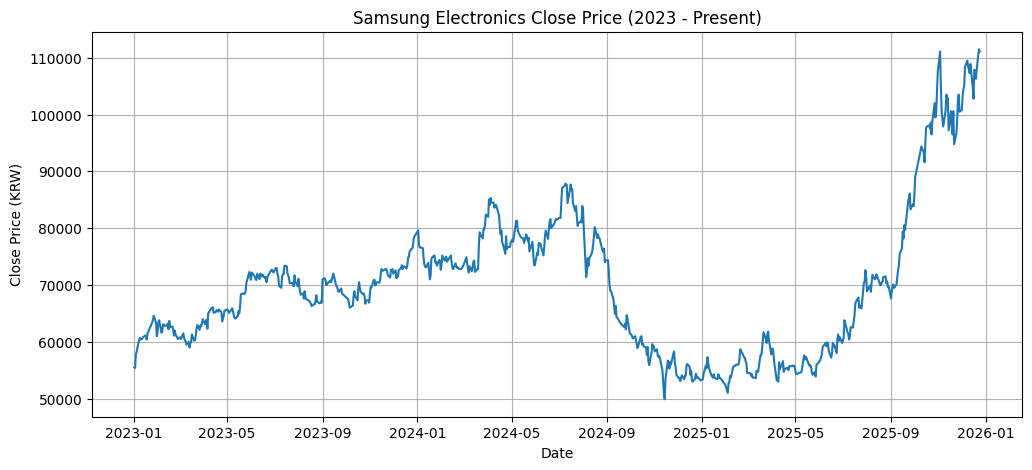

In [4]:
# 삼성전자 종가 그래프 만들기
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(12, 5))

# Close price time series
plt.plot(df.index, df['Close'])

# Title and axis labels (English only)
plt.title("Samsung Electronics Close Price (2023 - Present)")
plt.xlabel("Date")
plt.ylabel("Close Price (KRW)")

# Grid on 격자
plt.grid(True)

# Show plot 그래프
plt.show()


In [5]:
# 삼성전자 종가 변화율 데이터
# Daily return 계산 (전일 대비 종가 변화율)
df['DailyReturn'] = df['Close'].pct_change()

# 첫 행은 NaN이므로 제거
df_return = df.dropna()

# 결과 확인
display(df_return.head())


,Open,High,Low,Close,Volume,Change,DailyReturn
Date,,,,,,,
2023-01-03,55400,56000,54500,55400,13547030,-0.001802,-0.001802
2023-01-04,55700,58000,55600,57800,20188071,0.043321,0.043321
2023-01-05,58200,58800,57600,58200,15682826,0.006920,0.006920
2023-01-06,58300,59400,57900,59000,17334989,0.013746,0.013746
2023-01-09,59700,60700,59600,60700,18640107,0.028814,0.028814


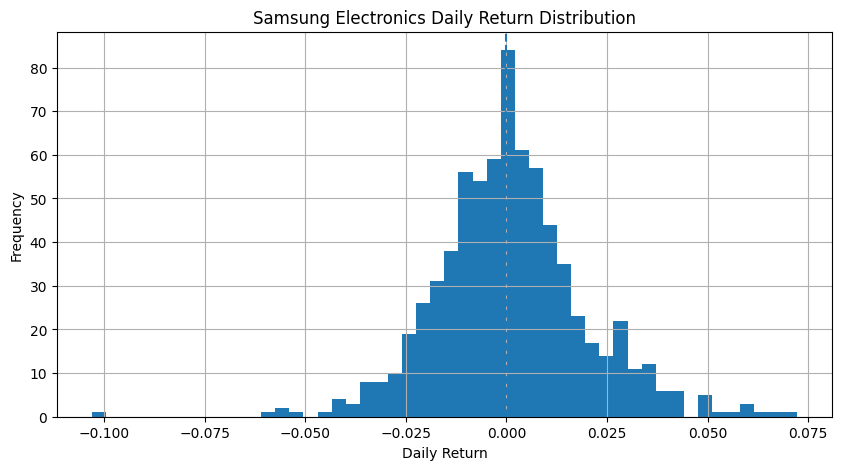

In [6]:
# 삼성전자 종가 변화율 시각화
import matplotlib.pyplot as plt

# 히스토그램 그리기
plt.figure(figsize=(10, 5))

plt.hist(df_return['DailyReturn'], bins=50)

# 제목 및 축 이름 (영어만 사용)
plt.title("Samsung Electronics Daily Return Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

# 기준선 (0% 수익률)
plt.axvline(0, linestyle='--')

# 격자 표시
plt.grid(True)

plt.show()


In [7]:
!pip -q install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 4.5 MB/s eta 0:00:00


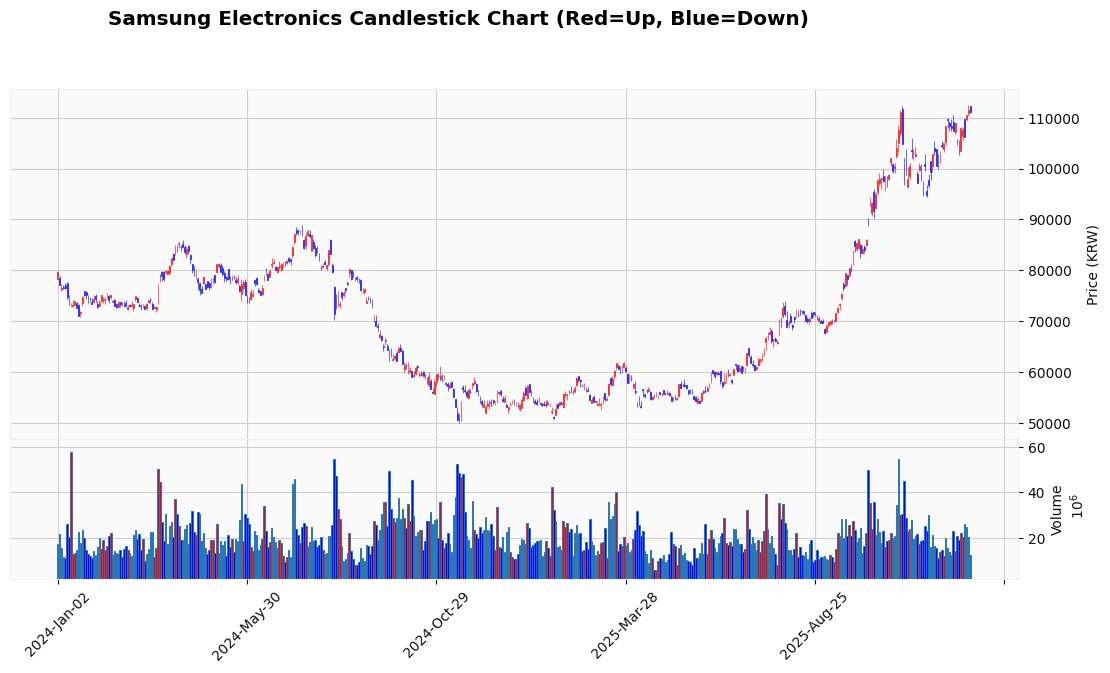

In [8]:
# 삼성전자 양봉/음봉 차트 시각화
import mplfinance as mpf

# 양봉/음봉 색상 설정
market_colors = mpf.make_marketcolors(
    up='red',        # 양봉 색상
    down='blue',     # 음봉 색상
    edge='inherit',  # 캔들 테두리는 본체 색상 상속
    wick='inherit',  # 꼬리 색상 상속
    volume='inherit'
)

# 전체 스타일 설정
style = mpf.make_mpf_style(
    marketcolors=market_colors,
    base_mpf_style='yahoo'
)

# 최근 1년 데이터만 사용 (가독성 + 경고 제거)
df_recent = df.loc["2024-01-01":]

# 캔들차트 출력
mpf.plot(
    df_recent,
    type='candle',
    style=style,
    volume=True,
    figsize=(14, 7),
    title="Samsung Electronics Candlestick Chart (Red=Up, Blue=Down)",
    ylabel="Price (KRW)",
    ylabel_lower="Volume"
)


In [9]:
# 삼성전자/카카오 데이터 수집
import FinanceDataReader as fdr
import pandas as pd
from datetime import datetime

# 기간 설정
start_date = "2023-01-01"
end_date = datetime.today().strftime("%Y-%m-%d")

# 종목 코드
samsung_code = "005930"
kakao_code = "035720"

# 데이터 수집
df_samsung = fdr.DataReader(samsung_code, start_date, end_date)
df_kakao = fdr.DataReader(kakao_code, start_date, end_date)


In [10]:
# 삼성전자/카카오 변동률 계산
# 일간 변동률 계산
df_samsung['DailyReturn'] = df_samsung['Close'].pct_change()
df_kakao['DailyReturn'] = df_kakao['Close'].pct_change()

# NaN 제거
df_samsung = df_samsung.dropna()
df_kakao = df_kakao.dropna()


In [11]:
# 두 종목의 일간 변동률을 하나의 데이터프레임으로 결합
df_compare = pd.DataFrame({
    'Samsung': df_samsung['DailyReturn'],
    'Kakao': df_kakao['DailyReturn']
}).dropna()

display(df_compare.head())


,Samsung,Kakao
Date,,
2023-01-03,-0.001802,0.011385
2023-01-04,0.043321,0.045028
2023-01-05,0.006920,0.035907
2023-01-06,0.013746,-0.008666
2023-01-09,0.028814,0.068182


In [12]:
# 삼성전자 카카오 2025년 데이터만 선택
df_2025 = df_compare.loc["2025-01-01":"2025-12-31"]

print("Number of trading days in 2025:", len(df_2025))
display(df_2025.head())


Number of trading days in 2025: 239


,Samsung,Kakao
Date,,
2025-01-02,0.003759,-0.019634
2025-01-03,0.018727,0.016021
2025-01-06,0.027574,0.028909
2025-01-07,-0.008945,-0.012771
2025-01-08,0.034296,-0.032342


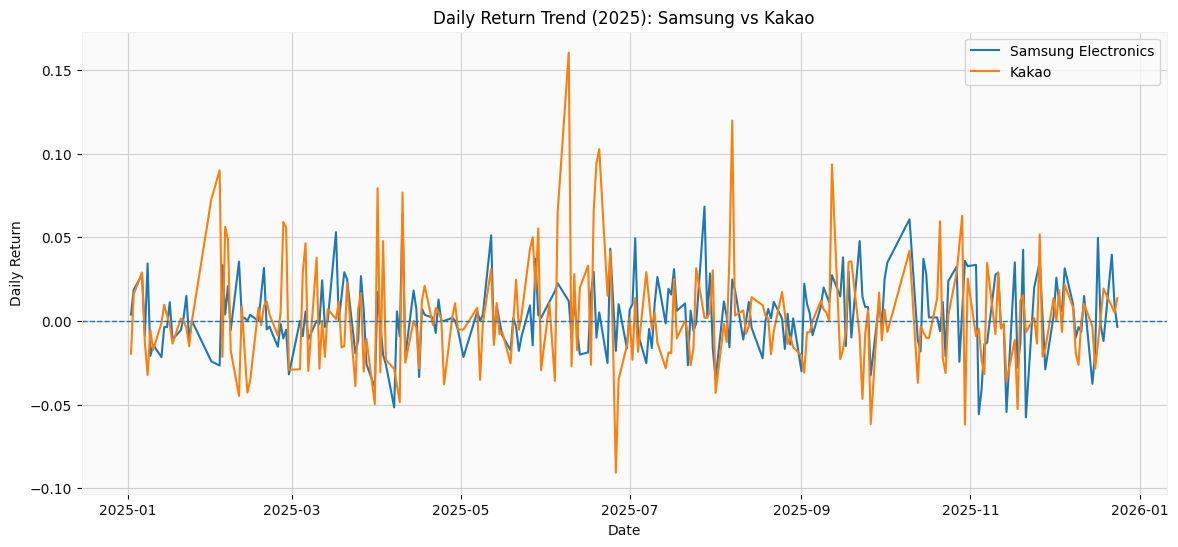

In [13]:
# 삼성전자 카카오 변화추이 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# 삼성전자 변동률
plt.plot(
    df_2025.index,
    df_2025['Samsung'],
    label='Samsung Electronics',
    linewidth=1.5
)

# 카카오 변동률
plt.plot(
    df_2025.index,
    df_2025['Kakao'],
    label='Kakao',
    linewidth=1.5
)

# 0% 기준선
plt.axhline(0, linestyle='--', linewidth=1)

# 제목 및 축 이름
plt.title("Daily Return Trend (2025): Samsung vs Kakao")
plt.xlabel("Date")
plt.ylabel("Daily Return")

# 범례 및 격자
plt.legend()
plt.grid(True)

plt.show()


In [14]:
# 삼성전자 종가 이동평균선 계산
# 삼성전자 데이터 사용 (df: 기존에 수집한 삼성전자 데이터)

# 20일 이동평균
df['MA20'] = df['Close'].rolling(window=20).mean()

# 60일 이동평균
df['MA60'] = df['Close'].rolling(window=60).mean()

# NaN 제거 (이동평균 계산 불가 구간)
df_ma = df.dropna()

display(df_ma.head())


,Open,High,Low,Close,Volume,Change,DailyReturn,MA20,MA60
Date,,,,,,,,,
2023-03-29,62500,62700,62200,62700,11216008,-0.003180,-0.003180,60900.0,61253.333333
2023-03-30,63700,63700,63100,63200,15684377,0.007974,0.007974,61020.0,61381.666667
2023-03-31,64000,64000,63700,64000,14094479,0.012658,0.012658,61195.0,61525.000000
2023-04-03,64000,64000,63000,63100,11973133,-0.014062,-0.014062,61275.0,61613.333333
2023-04-04,63400,63800,62800,63600,11120514,0.007924,0.007924,61420.0,61703.333333


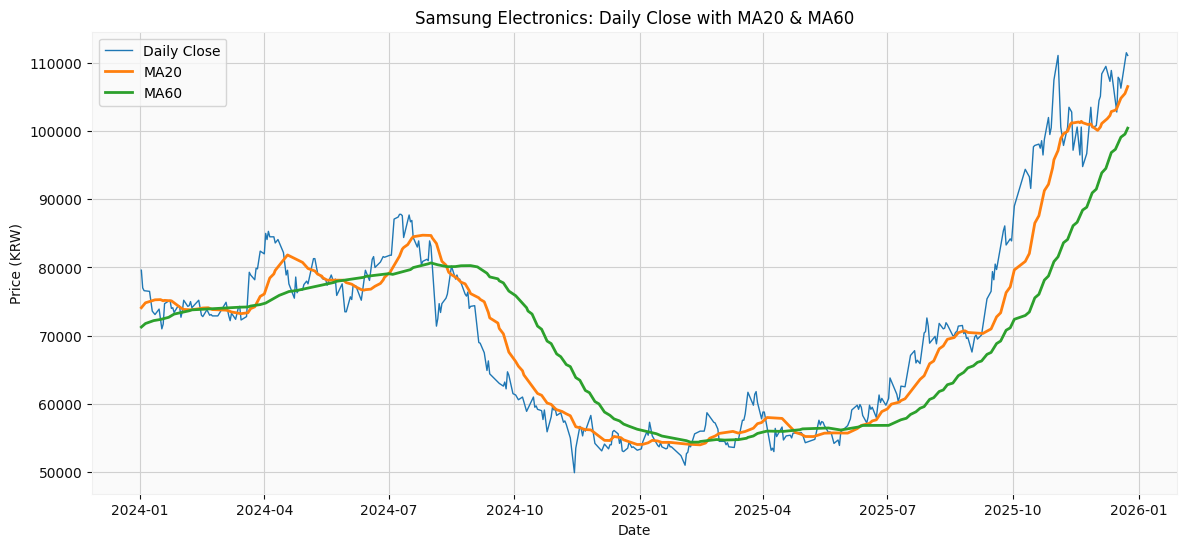

In [15]:
# 삼성전자 일일 종가 + MA20 + MA60 시각화
import matplotlib.pyplot as plt

# 최근 1년 데이터 선택
df_recent = df_ma.loc["2024-01-01":]

plt.figure(figsize=(14, 6))

# 일일 종가
plt.plot(
    df_recent.index,
    df_recent['Close'],
    label='Daily Close',
    linewidth=1
)

# 20일 이동평균
plt.plot(
    df_recent.index,
    df_recent['MA20'],
    label='MA20',
    linewidth=2
)

# 60일 이동평균
plt.plot(
    df_recent.index,
    df_recent['MA60'],
    label='MA60',
    linewidth=2
)

# 제목 및 축
plt.title("Samsung Electronics: Daily Close with MA20 & MA60")
plt.xlabel("Date")
plt.ylabel("Price (KRW)")

# 범례 및 격자
plt.legend()
plt.grid(True)

plt.show()


In [16]:
!pip -q install finance-datareader openpyxl


In [17]:
# 거래대금 상위 100위 데이터 분석
import FinanceDataReader as fdr
import pandas as pd
from datetime import datetime, timedelta
from concurrent.futures import ThreadPoolExecutor, as_completed

# =========================
# 설정
# =========================
top_n = 100
candidate_n = 800          # 후보군 크기 (빠르게 하려면 500~1000 추천)
max_workers = 20           # 병렬 워커 수 (너무 크면 차단/실패 증가 가능)
save_excel = "krx_top100_trading_value.xlsx"

# 오늘 날짜 (데이터가 없을 수 있으니 최근 영업일로 자동 보정)
today = datetime.today().date()

def get_latest_workday(max_back=10):
    # 최근 거래일 찾기(주말/휴장 대비): DataReader가 비면 하루씩 뒤로
    d = today
    for _ in range(max_back):
        ymd = d.strftime("%Y-%m-%d")
        # 삼성전자 하나로 "그 날짜가 거래일인지" 가볍게 확인
        test = fdr.DataReader("005930", ymd, ymd)
        if not test.empty:
            return ymd
        d -= timedelta(days=1)
    return today.strftime("%Y-%m-%d")

trade_date = get_latest_workday()
print("Trade date:", trade_date)

# =========================
# 1) 전종목 리스트 가져오기 (StockListing)
# =========================
krx = fdr.StockListing("KRX")

# 필요한 컬럼만 확인
# display(krx.head())

# 시가총액 컬럼명이 환경에 따라 다를 수 있어 후보를 둠
mcap_candidates = ["Marcap", "MarketCap", "시가총액"]
code_candidates = ["Code", "종목코드"]
name_candidates = ["Name", "종목명"]

def pick_col(df, cands):
    for c in cands:
        if c in df.columns:
            return c
    return None

col_mcap = pick_col(krx, mcap_candidates)
col_code = pick_col(krx, code_candidates)
col_name = pick_col(krx, name_candidates)

if col_code is None:
    raise RuntimeError("StockListing 결과에서 종목코드 컬럼을 찾지 못했습니다.")

# =========================
# 2) 후보군 축소: 시총 상위 candidate_n개
# =========================
if col_mcap is not None:
    # 시가총액이 있으면 시총 상위로 후보군을 줄임(가장 합리적)
    krx[col_mcap] = pd.to_numeric(krx[col_mcap], errors="coerce")
    candidates = (
        krx.dropna(subset=[col_mcap])
           .sort_values(col_mcap, ascending=False)
           .head(candidate_n)
           .copy()
    )
else:
    # 시총 컬럼이 없다면, 어쩔 수 없이 앞에서 candidate_n개만(정확도 떨어짐)
    candidates = krx.head(candidate_n).copy()

codes = candidates[col_code].tolist()

# 이름 매핑 준비
name_map = {}
if col_name is not None:
    name_map = dict(zip(candidates[col_code], candidates[col_name]))

print("Candidates:", len(codes))

# =========================
# 3) 후보군에 대해서만 오늘 1일 데이터 조회 후 거래대금 계산
# =========================
def fetch_one(code: str):
    try:
        df = fdr.DataReader(code, trade_date, trade_date)
        if df.empty:
            return None
        close_price = float(df["Close"].iloc[0])
        volume = float(df["Volume"].iloc[0])
        trading_value = close_price * volume
        return (code, close_price, volume, trading_value)
    except:
        return None

rows = []
with ThreadPoolExecutor(max_workers=max_workers) as ex:
    futures = [ex.submit(fetch_one, c) for c in codes]
    for fut in as_completed(futures):
        r = fut.result()
        if r:
            rows.append(r)

df_val = pd.DataFrame(rows, columns=["Code", "Close", "Volume", "TradingValue"])

# 종목명 붙이기
if name_map:
    df_val["Name"] = df_val["Code"].map(name_map)

# =========================
# 4) 거래대금 Top100
# =========================
df_top100 = (
    df_val.dropna(subset=["TradingValue"])
          .sort_values("TradingValue", ascending=False)
          .head(top_n)
          .reset_index(drop=True)
)

display(df_top100)

# 엑셀 저장
df_top100.to_excel(save_excel, index=False)
print("Saved:", save_excel)


Trade date: 2025-12-24
Candidates: 800


,Code,Close,Volume,TradingValue,Name
0,005930,111100.0,12492939.0,1.387966e+12,삼성전자
1,000660,588000.0,2150386.0,1.264427e+12,SK하이닉스
2,319400,18580.0,45850432.0,8.519010e+11,현대무벡스
3,476830,172700.0,4932257.0,8.518008e+11,알지노믹스
4,042660,119000.0,6204256.0,7.383065e+11,한화오션
...,...,...,...,...,...
95,310210,215500.0,150694.0,3.247456e+10,보로노이
96,036570,209000.0,153846.0,3.215381e+10,엔씨소프트
97,028260,240000.0,133920.0,3.214080e+10,삼성물산
98,950250,9000.0,3421332.0,3.079199e+10,테라뷰


Saved: krx_top100_trading_value.xlsx


In [18]:
# Top100 종목의 전일 대비 등락률 계산
import FinanceDataReader as fdr
import pandas as pd
from datetime import datetime, timedelta
from concurrent.futures import ThreadPoolExecutor, as_completed

# =========================
# 설정
# =========================
max_workers = 20

# Top100에서 종목 코드만 추출
codes = df_top100['Code'].tolist()

# 최근 거래일과 그 전 거래일 설정
trade_date = trade_date  # 앞 단계에서 구한 최근 거래일
prev_date = (datetime.strptime(trade_date, "%Y-%m-%d") - timedelta(days=5)).strftime("%Y-%m-%d")
# ↑ 주말/휴장 대비해서 넉넉히 5일 전부터 조회

def fetch_return(code: str):
    try:
        # 최근 거래일 ~ 이전 기간 조회
        df = fdr.DataReader(code, prev_date, trade_date)
        if len(df) < 2:
            return None

        close_today = df['Close'].iloc[-1]
        close_prev = df['Close'].iloc[-2]

        daily_return = (close_today - close_prev) / close_prev

        return (code, close_today, daily_return)
    except:
        return None

rows = []
with ThreadPoolExecutor(max_workers=max_workers) as ex:
    futures = [ex.submit(fetch_return, c) for c in codes]
    for fut in as_completed(futures):
        r = fut.result()
        if r:
            rows.append(r)

df_return = pd.DataFrame(
    rows,
    columns=['Code', 'Close', 'DailyReturn']
)

# 종목명 붙이기
df_return = df_return.merge(
    df_top100[['Code', 'Name']],
    on='Code',
    how='left'
)

display(df_return.head())


,Code,Close,DailyReturn,Name
0,476830,172700,0.068027,알지노믹스
1,488900,15520,0.175758,비츠로넥스텍
2,478340,36350,0.043042,나라스페이스테크놀로지
3,125490,18730,0.116875,한라캐스트
4,466100,66600,0.007564,클로봇


In [19]:
# 상승주도주 5 / 하락주도주 5 추출
# 상승주도주 Top 5 (등락률 상위)
leaders_up = (
    df_return.sort_values('DailyReturn', ascending=False)
             .head(5)
             .reset_index(drop=True)
)

# 하락주도주 Bottom 5 (등락률 하위)
leaders_down = (
    df_return.sort_values('DailyReturn', ascending=True)
             .head(5)
             .reset_index(drop=True)
)

print("Upward Leaders (Top 5)")
display(leaders_up)

print("Downward Leaders (Bottom 5)")
display(leaders_down)


Upward Leaders (Top 5)


,Code,Close,DailyReturn,Name
0,318060,25700,0.184332,그래피
1,488900,15520,0.175758,비츠로넥스텍
2,033530,11850,0.130725,SJG세종
3,125490,18730,0.116875,한라캐스트
4,298830,7930,0.109091,슈어소프트테크


Downward Leaders (Bottom 5)


,Code,Close,DailyReturn,Name
0,217590,21100,-0.107822,티엠씨
1,077970,35800,-0.084399,STX엔진
2,100790,14250,-0.083601,미래에셋벤처투자
3,950250,9000,-0.076923,테라뷰
4,437730,57500,-0.069579,삼현


In [20]:
# 상승주도주 5 / 하락주도주 5 추출 및 퍼센트화
leaders_up['DailyReturn(%)'] = leaders_up['DailyReturn'] * 100
leaders_down['DailyReturn(%)'] = leaders_down['DailyReturn'] * 100

display(leaders_up[['Code', 'Name', 'DailyReturn(%)']])
display(leaders_down[['Code', 'Name', 'DailyReturn(%)']])


,Code,Name,DailyReturn(%)
0,318060,그래피,18.433180
1,488900,비츠로넥스텍,17.575758
2,033530,SJG세종,13.072519
3,125490,한라캐스트,11.687537
4,298830,슈어소프트테크,10.909091


,Code,Name,DailyReturn(%)
0,217590,티엠씨,-10.782241
1,077970,STX엔진,-8.439898
2,100790,미래에셋벤처투자,-8.360129
3,950250,테라뷰,-7.692308
4,437730,삼현,-6.957929


In [21]:
!pip -q install finance-datareader


=== Samsung Electronics 6M Holding Historical VaR ===
Data period: 2015-01-01 ~ 2025-12-24
Holding days: 126
VaR 95% (return): 23.24% | (amount): 23,237,488 KRW
VaR 99% (return): 33.33% | (amount): 33,333,333 KRW


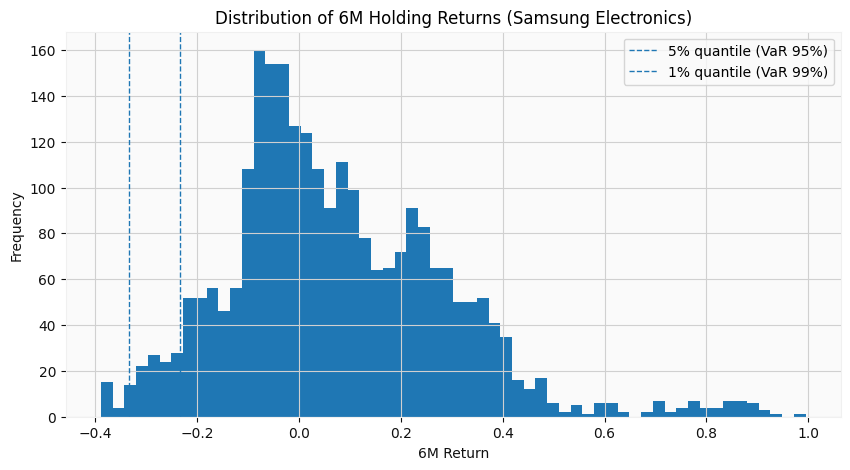

In [22]:
# 예상손실액 구해보기
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# =========================
# 설정
# =========================
ticker = "005930"                 # Samsung Electronics
start_date = "2015-01-01"         # 분포를 안정적으로 보려면 기간을 길게 권장
end_date = datetime.today().strftime("%Y-%m-%d")

investment = 100_000_000          # 1억원
holding_days = 126                # 6개월(거래일 기준)

# =========================
# 1) 데이터 수집
# =========================
df = fdr.DataReader(ticker, start_date, end_date)
close = df["Close"].dropna()

# =========================
# 2) 6개월 보유 수익률(rolling) 계산
#    R_t = Close_t / Close_{t-126} - 1
# =========================
ret_6m = (close / close.shift(holding_days) - 1).dropna()

# =========================
# 3) VaR 계산 (Historical VaR)
#    - 손실 분포 기준: 하위 5%, 하위 1% 분위
# =========================
q_5 = ret_6m.quantile(0.05)   # 5% 분위(대개 음수)
q_1 = ret_6m.quantile(0.01)   # 1% 분위(더 음수)

# VaR은 "손실액(양수)"로 표시하는 경우가 많아서 부호를 뒤집어 표현
var95_return = -q_5
var99_return = -q_1

var95_amount = var95_return * investment
var99_amount = var99_return * investment

print("=== Samsung Electronics 6M Holding Historical VaR ===")
print("Data period:", start_date, "~", end_date)
print("Holding days:", holding_days)
print(f"VaR 95% (return): {var95_return:.2%} | (amount): {var95_amount:,.0f} KRW")
print(f"VaR 99% (return): {var99_return:.2%} | (amount): {var99_amount:,.0f} KRW")

# =========================
# 4) 시각화: 6개월 수익률 분포 + VaR 선 표시
# =========================
plt.figure(figsize=(10, 5))
plt.hist(ret_6m.values, bins=60)
plt.axvline(q_5, linestyle="--", linewidth=1, label="5% quantile (VaR 95%)")
plt.axvline(q_1, linestyle="--", linewidth=1, label="1% quantile (VaR 99%)")
plt.title("Distribution of 6M Holding Returns (Samsung Electronics)")
plt.xlabel("6M Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.legend()
plt.show()


=== Samsung Electronics Maximum Drawdown ===
Data period: 2015-01-01 ~ 2025-12-24
MDD (return): -45.16%
MDD period: 2021-01-11 -> 2024-11-14
MDD loss amount (1억 기준): 45,164,835 KRW


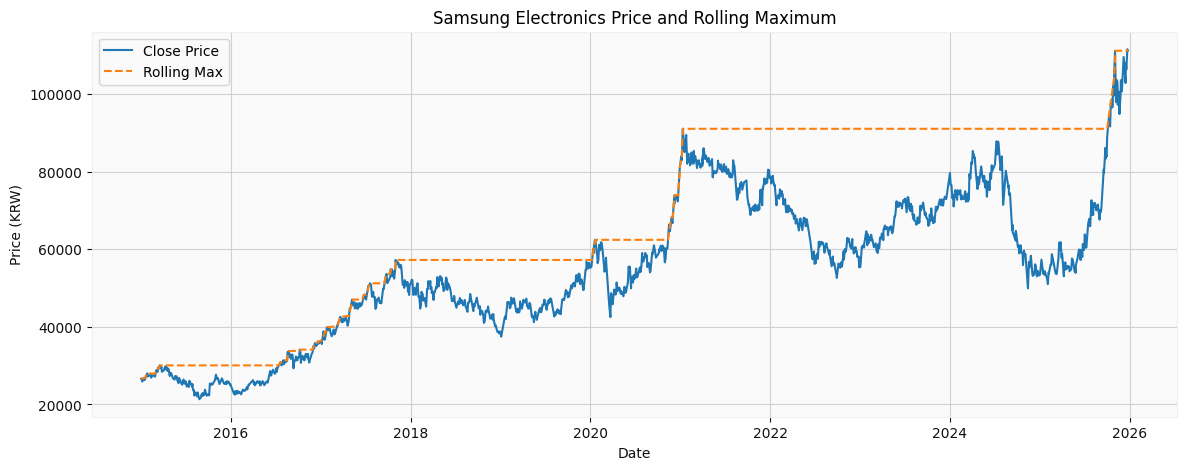

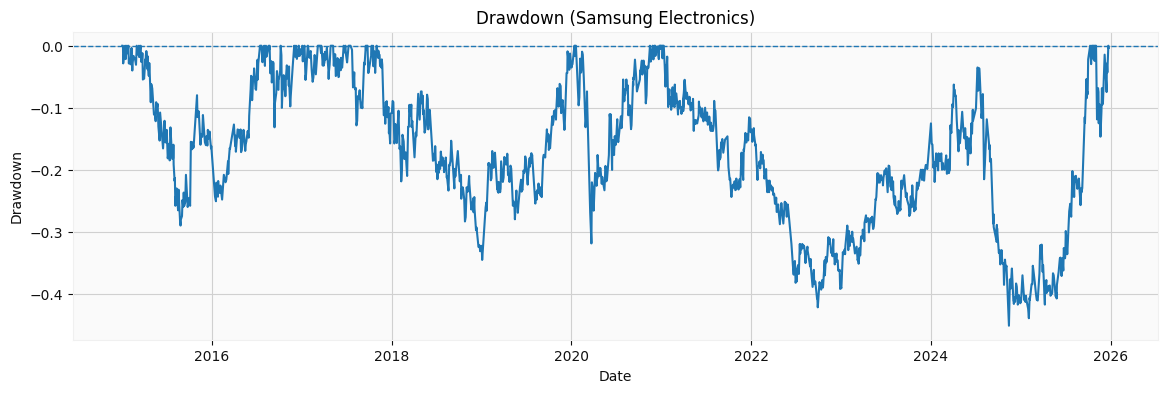

In [23]:
# 최대손실낙폭 시각화
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# =========================
# 설정
# =========================
ticker = "005930"                 # Samsung Electronics
start_date = "2015-01-01"         # 충분히 긴 기간 권장
end_date = datetime.today().strftime("%Y-%m-%d")

investment = 100_000_000          # 1억원

# =========================
# 1) 데이터 수집
# =========================
df = fdr.DataReader(ticker, start_date, end_date)
close = df["Close"].dropna()

# =========================
# 2) 누적 최고가(Rolling Max) 계산
# =========================
rolling_max = close.cummax()

# =========================
# 3) Drawdown 계산
# =========================
drawdown = close / rolling_max - 1

# =========================
# 4) 최대손실낙폭(MDD)
# =========================
mdd = drawdown.min()                  # 음수 값
mdd_amount = -mdd * investment        # 손실액(양수)

mdd_end_date = drawdown.idxmin()
mdd_start_date = close.loc[:mdd_end_date].idxmax()

print("=== Samsung Electronics Maximum Drawdown ===")
print("Data period:", start_date, "~", end_date)
print(f"MDD (return): {mdd:.2%}")
print("MDD period:", mdd_start_date.date(), "->", mdd_end_date.date())
print(f"MDD loss amount (1억 기준): {mdd_amount:,.0f} KRW")

# =========================
# 5) 시각화: 가격 + Drawdown
# =========================
plt.figure(figsize=(14, 5))
plt.plot(close.index, close.values, label="Close Price")
plt.plot(rolling_max.index, rolling_max.values, linestyle="--", label="Rolling Max")
plt.title("Samsung Electronics Price and Rolling Maximum")
plt.xlabel("Date")
plt.ylabel("Price (KRW)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(drawdown.index, drawdown.values)
plt.axhline(0, linestyle="--", linewidth=1)
plt.title("Drawdown (Samsung Electronics)")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.grid(True)
plt.show()


In [24]:
# 코스피 & 다우존스 데이터 수집
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# =========================
# 설정
# =========================
start_date = "2015-01-01"
end_date = datetime.today().strftime("%Y-%m-%d")

# =========================
# 1) 지수 데이터 수집
# =========================
kospi = fdr.DataReader("KS11", start_date, end_date)
dow   = fdr.DataReader("DJI", start_date, end_date)

# 종가만 사용
df = pd.DataFrame({
    "KOSPI": kospi["Close"],
    "DOW": dow["Close"]
}).dropna()

display(df.head())


,KOSPI,DOW
2015-01-02,1926.44,17832.990234
2015-01-05,1915.75,17501.650391
2015-01-06,1882.45,17371.640625
2015-01-07,1883.83,17584.519531
2015-01-08,1904.65,17907.869141


In [25]:
# 일간 수익률 계산
returns = df.pct_change().dropna()

display(returns.head())


,KOSPI,DOW
2015-01-05,-0.005549,-0.018580
2015-01-06,-0.017382,-0.007428
2015-01-07,0.000733,0.012254
2015-01-08,0.011052,0.018388
2015-01-09,0.010527,-0.009521


In [26]:
# 상관계수 계산
corr = returns["KOSPI"].corr(returns["DOW"])
print(f"Correlation (Daily Return): {corr:.3f}")


Correlation (Daily Return): 0.228


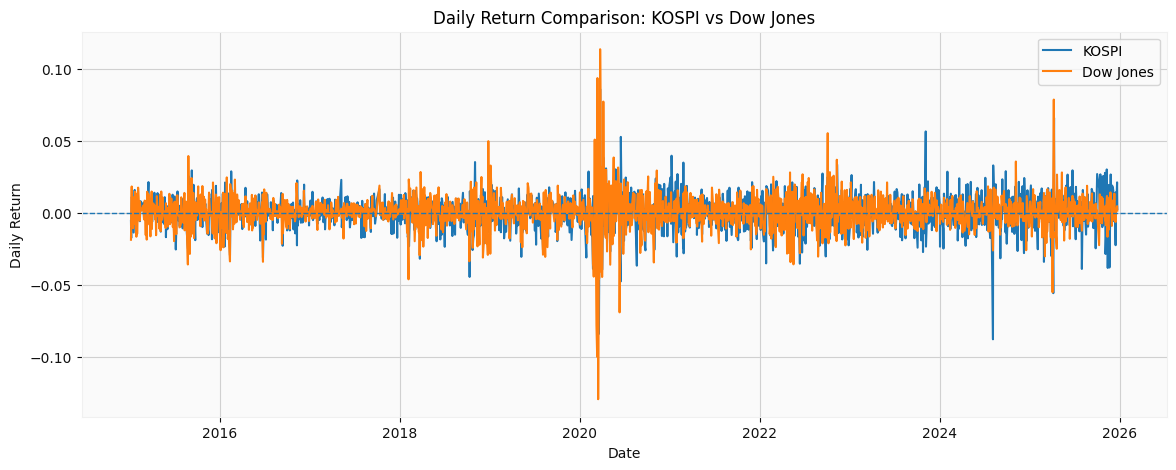

In [27]:
# 시각화 ① 수익률 시계열 비교
plt.figure(figsize=(14, 5))

plt.plot(returns.index, returns["KOSPI"], label="KOSPI")
plt.plot(returns.index, returns["DOW"], label="Dow Jones")

plt.axhline(0, linestyle="--", linewidth=1)
plt.title("Daily Return Comparison: KOSPI vs Dow Jones")
plt.xlabel("Date")
plt.ylabel("Daily Return")

plt.legend()
plt.grid(True)
plt.show()


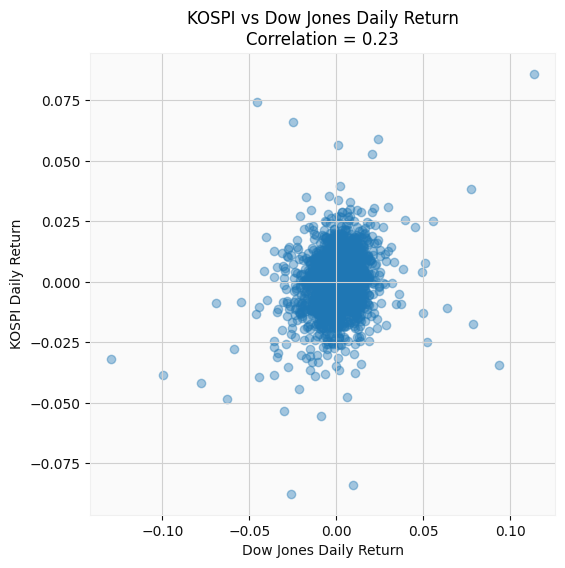

In [28]:
# 시각화 ② 상관관계 산점도 (핵심)
plt.figure(figsize=(6, 6))

plt.scatter(
    returns["DOW"],
    returns["KOSPI"],
    alpha=0.4
)

plt.title(f"KOSPI vs Dow Jones Daily Return\nCorrelation = {corr:.2f}")
plt.xlabel("Dow Jones Daily Return")
plt.ylabel("KOSPI Daily Return")

plt.grid(True)
plt.show()


In [29]:
# 수익률 계산
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

# =========================
# 설정
# =========================
start_date = "2015-01-01"
end_date = datetime.today().strftime("%Y-%m-%d")

# =========================
# 데이터 수집
# =========================
kospi = fdr.DataReader("KS11", start_date, end_date)
dow   = fdr.DataReader("DJI", start_date, end_date)

# 종가 기준 병합
df = pd.DataFrame({
    "KOSPI": kospi["Close"],
    "DOW": dow["Close"]
}).dropna()

# 일간 수익률 계산
returns = df.pct_change().dropna()

display(returns.head())


,KOSPI,DOW
2015-01-05,-0.005549,-0.018580
2015-01-06,-0.017382,-0.007428
2015-01-07,0.000733,0.012254
2015-01-08,0.011052,0.018388
2015-01-09,0.010527,-0.009521


In [30]:
# 선형회귀분석
# 독립변수(X): 다우 수익률
# 종속변수(Y): 코스피 수익률
X = returns["DOW"].values
Y = returns["KOSPI"].values

# 선형회귀 계수 계산 (최소제곱법)
beta, alpha = np.polyfit(X, Y, 1)

print("=== Linear Regression Result ===")
print(f"Alpha (Intercept): {alpha:.4f}")
print(f"Beta  (Slope)    : {beta:.4f}")


=== Linear Regression Result ===
Alpha (Intercept): 0.0003
Beta  (Slope)    : 0.2223


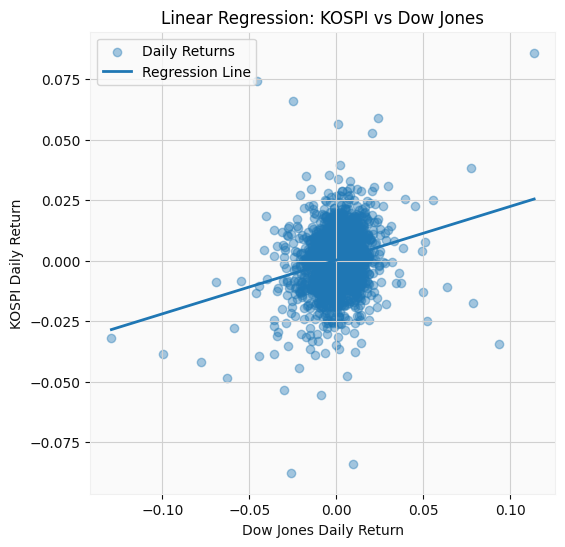

In [31]:
# 회귀선 시각
plt.figure(figsize=(6, 6))

# 산점도
plt.scatter(X, Y, alpha=0.4, label="Daily Returns")

# 회귀선
x_line = np.linspace(X.min(), X.max(), 100)
y_line = alpha + beta * x_line
plt.plot(x_line, y_line, linewidth=2, label="Regression Line")

plt.title("Linear Regression: KOSPI vs Dow Jones")
plt.xlabel("Dow Jones Daily Return")
plt.ylabel("KOSPI Daily Return")

plt.legend()
plt.grid(True)
plt.show()

In [32]:
# 결정계수 계
# 예측값
Y_pred = alpha + beta * X

# R-squared 계산
ss_res = np.sum((Y - Y_pred) ** 2)
ss_tot = np.sum((Y - np.mean(Y)) ** 2)
r2 = 1 - ss_res / ss_tot

print(f"R-squared: {r2:.3f}")


R-squared: 0.052
